In [14]:
# import libraries 
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [11]:

# Load dataset (only 2 classes for binary classification)
iris = load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]


In [10]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [8]:

# Chebyshev’s Inequality on predicted probabilities
mean_prob = np.mean(y_prob_log)
std_prob = np.std(y_prob_log)
k = 2  # 2 standard deviations

upper_bound = mean_prob + k * std_prob
lower_bound = mean_prob - k * std_prob

outliers = np.where((y_prob_log > upper_bound) | (y_prob_log < lower_bound))[0]


In [7]:

print("Chebyshev Bound (k=2):")
print(f"Mean = {mean_prob:.3f}, Std = {std_prob:.3f}")
print(f"Lower Bound = {lower_bound:.3f}, Upper Bound = {upper_bound:.3f}")
print(f"Outlier indices: {outliers.tolist()}")


Chebyshev Bound (k=2):
Mean = 0.440, Std = 0.477
Lower Bound = -0.515, Upper Bound = 1.395
Outlier indices: []


In [6]:
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [4]:

# Evaluation
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


--- Logistic Regression ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
print("\n--- Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


--- Naive Bayes ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



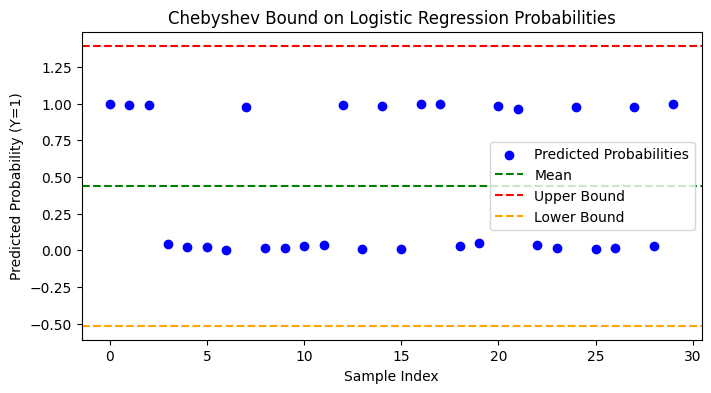

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(range(len(y_prob_log)), y_prob_log, color='blue', label='Predicted Probabilities')
plt.axhline(mean_prob, color='green', linestyle='--', label='Mean')
plt.axhline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='orange', linestyle='--', label='Lower Bound')
plt.title("Chebyshev Bound on Logistic Regression Probabilities")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability (Y=1)")
plt.legend()
plt.show()